In [6]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [7]:
def get_pred(city, doenca, label): 
    data_lstm = pickle.load(open(f'../../predictions/lstm/lstm_{city}_{doenca}_{label}.pkl', 'rb'))
    
    Ydata = data_lstm['target'] 
    indice = data_lstm['indice']
    factor = data_lstm['factor'] 
    split_point = len(data_lstm['xdata'] )

    df_predicted = data_lstm['pred'] 
    
    return indice, Ydata, split_point, df_predicted, factor 

In [18]:
city = 2611606
doenca = 'dengue'
label = 'msle'
indice, Ydata, split_point, df_predicted, factor = get_pred(city, doenca, label)


In [57]:
Ydata*factor
        

array([[   0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       ...,
       [ 426.,  541.,  767.,  968.],
       [ 541.,  767.,  968., 1051.],
       [ 767.,  968., 1051., 1113.]])

In [34]:
t[0][3] = np.nan

t

array([[0.25115562, 0.24756035, 0.27580894,        nan],
       [0.24756035, 0.27580894, 0.34103749, 0.38161274]])

In [58]:
def plot_dengue_test_lstm(ax, city, doenca, title = 'Comparation de median output of the model using MSLE and Custom - MSLE'):
    
    # msle predictions 
    indice, Ydata, split_point, df_predicted, factor = get_pred(city, doenca, label = 'msle')
    
    curve = Ydata*factor

    for ar in curve:

        if ar[3] < ar[1]:

            ar[3] = np.nan
        
    ax.plot(indice[split_point + len(indice)-Ydata.shape[0]:], Ydata[split_point:, -1] * factor, 'k-', alpha=0.7, label='data')
    
    ax.plot(indice[split_point + len(indice)-Ydata.shape[0]:], curve[split_point:, -1], color = 'blue', marker = 'o', ls = ' ', alpha=0.7, label='points - custom loss')
    
    ax.plot(indice[split_point+ len(indice)-Ydata.shape[0]:], df_predicted.iloc[split_point:,-1] * factor, 'r-', label='MSLE')
    
    # custom msle predictions 
    indice_C, Ydata_C, split_point_C, df_predicted_C, factor_C = get_pred(city, doenca, label = 'custom_msle')
    
    ax.plot(indice_C[split_point_C+ len(indice_C)-Ydata_C.shape[0]:], df_predicted_C.iloc[split_point_C:,-1] * factor_C, color = 'tab:blue', ls= '--', label='Custom - MSLE')
    

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("dengue incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    
    return 

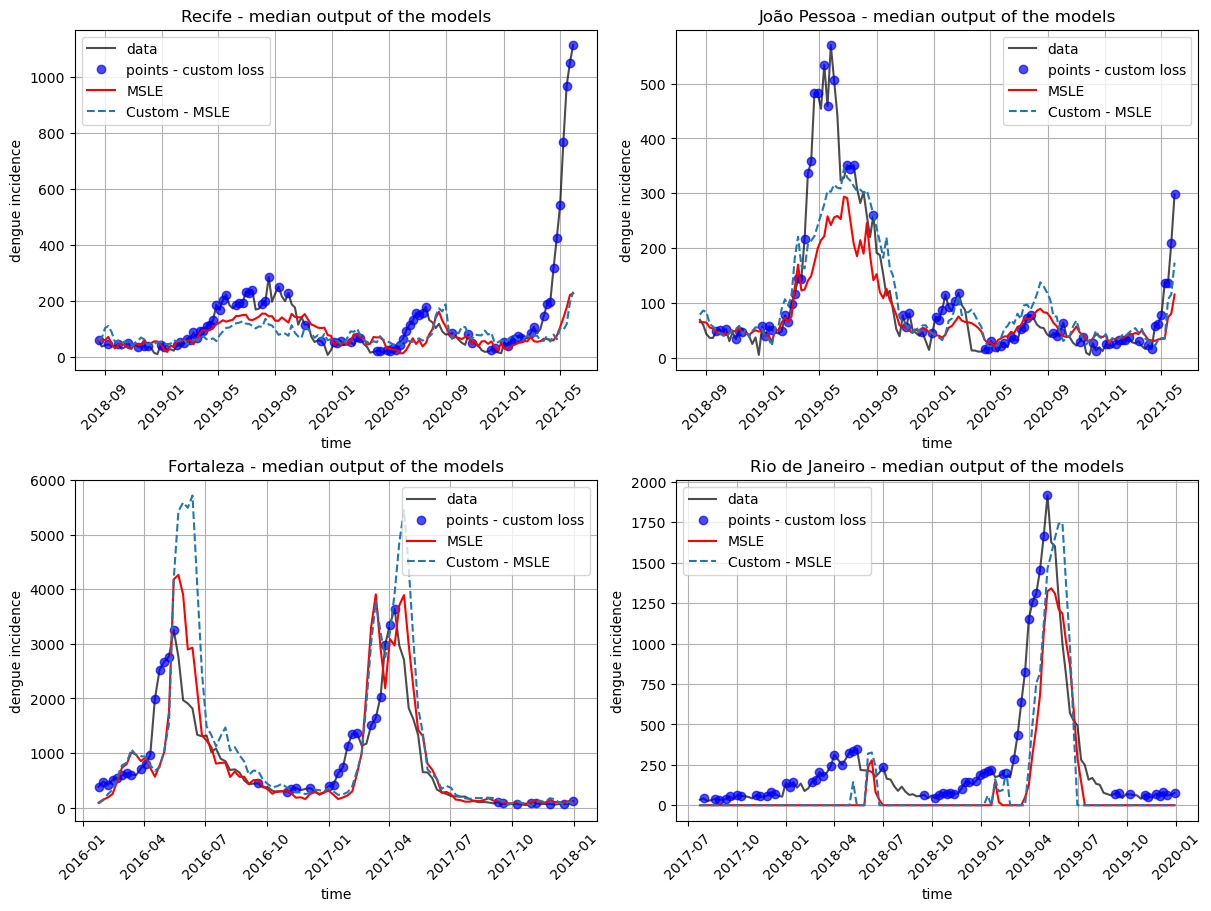

In [59]:
fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
# recife
city = 2611606
plot_dengue_test_lstm(axd['a'], city, doenca = 'dengue', title = 'Recife - median output of the models')

# joao pessoa
city = 2507507
plot_dengue_test_lstm(axd['b'], city, doenca = 'dengue', title = 'João Pessoa - median output of the models')

# fortaleza
city = 2304400
plot_dengue_test_lstm(axd['c'], city, doenca = 'dengue', title = 'Fortaleza - median output of the models')

# Rio de Janeiro
city = 3304557
plot_dengue_test_lstm(axd['d'], city, doenca = 'dengue',  title = 'Rio de Janeiro - median output of the models')

fig.savefig(f'comp_msle_c_msle.png',bbox_inches='tight', format = 'png', dpi = 300)
    
plt.show()